# Graph Coloring Problem

$$
\begin{align}
    \text{min} \quad & \sum_{c \in C} y_{c} \\
    \text{s.t} \quad & \sum_{c \in C} x_{i, c} = 1 & \forall \; i \in N \\
    & x_{i, c} + x_{j, c} \leq y_{c} & \forall \; i, j \in E, c \in C \\
    & y_{C_{k-1}} \leq y_{C_{k}} & \forall \; k \in (2, ..., |C|) \\
    & x_{i, c} \in \{0, 1\} & \forall \; i \in N, c \in C \\
    & y_{c} \in \{0, 1\} & \forall \; c \in C
\end{align}
$$

In [1]:
import pyomo.environ as pyo
import matplotlib.pyplot as plt

from gcol.dataloader import load_instance
from gcol.dsatur import DSatur
from gcol.ilp import ilp_from_dsatur
from gcol.plot import draw_colored_graph, draw_from_nodes, draw_colored_gif

In [2]:
data = load_instance("instances/input_32.txt")

In [4]:
dsatur = DSatur(data["nodes"], data["edges"])
dsatur.solve(save_history=True)

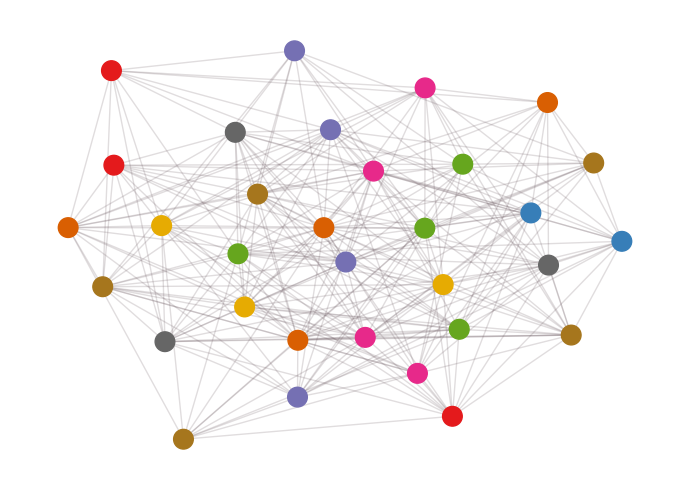

In [6]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_from_nodes(dsatur.N, ax=ax, plot_margins=False, use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()

In [8]:
# draw_colored_gif(
#     "coloring_history_loop_32.gif", dsatur.history, use_labels=0, edge_alpha=0.2, edge_color="#68555D",
#     layout_iter=1000, seed=12, figsize=[7, 5], dpi=200, plot_margins=False,
#     duration=250,
# )

In [7]:
ilp = ilp_from_dsatur(dsatur)

In [8]:
solver = pyo.SolverFactory("appsi_highs")
res = solver.solve(ilp, tee=True)
print(res)

Presolving model
4684 rows, 297 cols, 14236 nonzeros
2362 rows, 297 cols, 7270 nonzeros
2360 rows, 295 cols, 6750 nonzeros
Objective function is integral with scale 1

Solving MIP model with:
   2360 rows
   295 cols (295 binary, 0 integer, 0 implied int., 0 continuous)
   6750 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   2               inf                  inf        0      0      0         0     0.1s
         0       0         0   0.00%   2               inf                  inf        0      0     12       259     0.1s
 F       0       0         0   0.00%   7               9                 22.22%      749     73    223      4019     1.6s

12.9% inactive integer columns, restarting
Model after restart has 747 rows, 257 cols (257 bin., 0 

In [9]:
colors = []
nodes = []
for n in ilp.N:
    nodes.append(n)
    for c in ilp.C:
        if round(ilp.x[n, c].value, ndigits=0) == 1:
            colors.append(c)

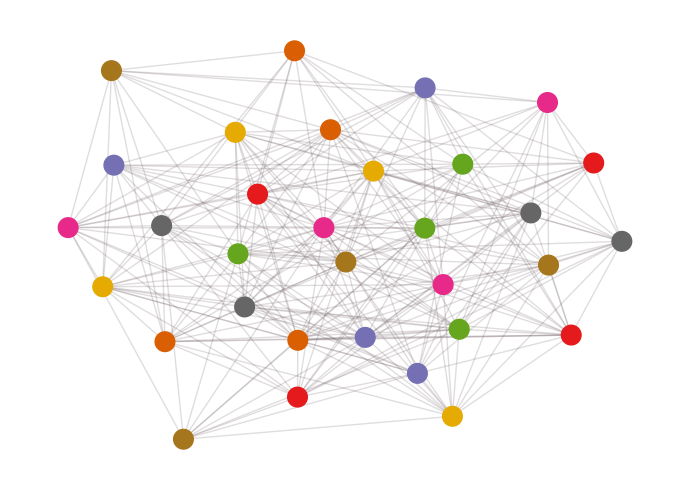

: 

In [10]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_colored_graph(nodes, colors, data["edges"], ax=ax, plot_margins=False, use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()